<a href="https://colab.research.google.com/github/WilderGitHub/datascience/blob/main/Regresion_basico_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ejemplo de regresión**

Objetivo: que el alumno aprenda cómo están organizados los datos en un problema de aprendizaje supervisado. Además, que sea capaz de implementar un regresor para un problema de referencia.


(1) Carguemos un conjunto de datos para una tarea de regresión

In [ ]:
# Ejemplo de regresión
# Usemos datos de scikitlearn
from sklearn import datasets
# Carguemos un dataset asociado a alguna tarea de regresión
print("Cargando dataset ... Diabetes")
X, y = datasets.load_diabetes(return_X_y=True)
print('El conjunto de datos tiene ', X.shape[0], 'ejemplos y ', X.shape[1],'atributos')



Cargando dataset ... Diabetes
El conjunto de datos tiene  442 ejemplos y  10 atributos


(2) Analicemos el conjunto de datos en términos de tipos de atributos y variable a predecir

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


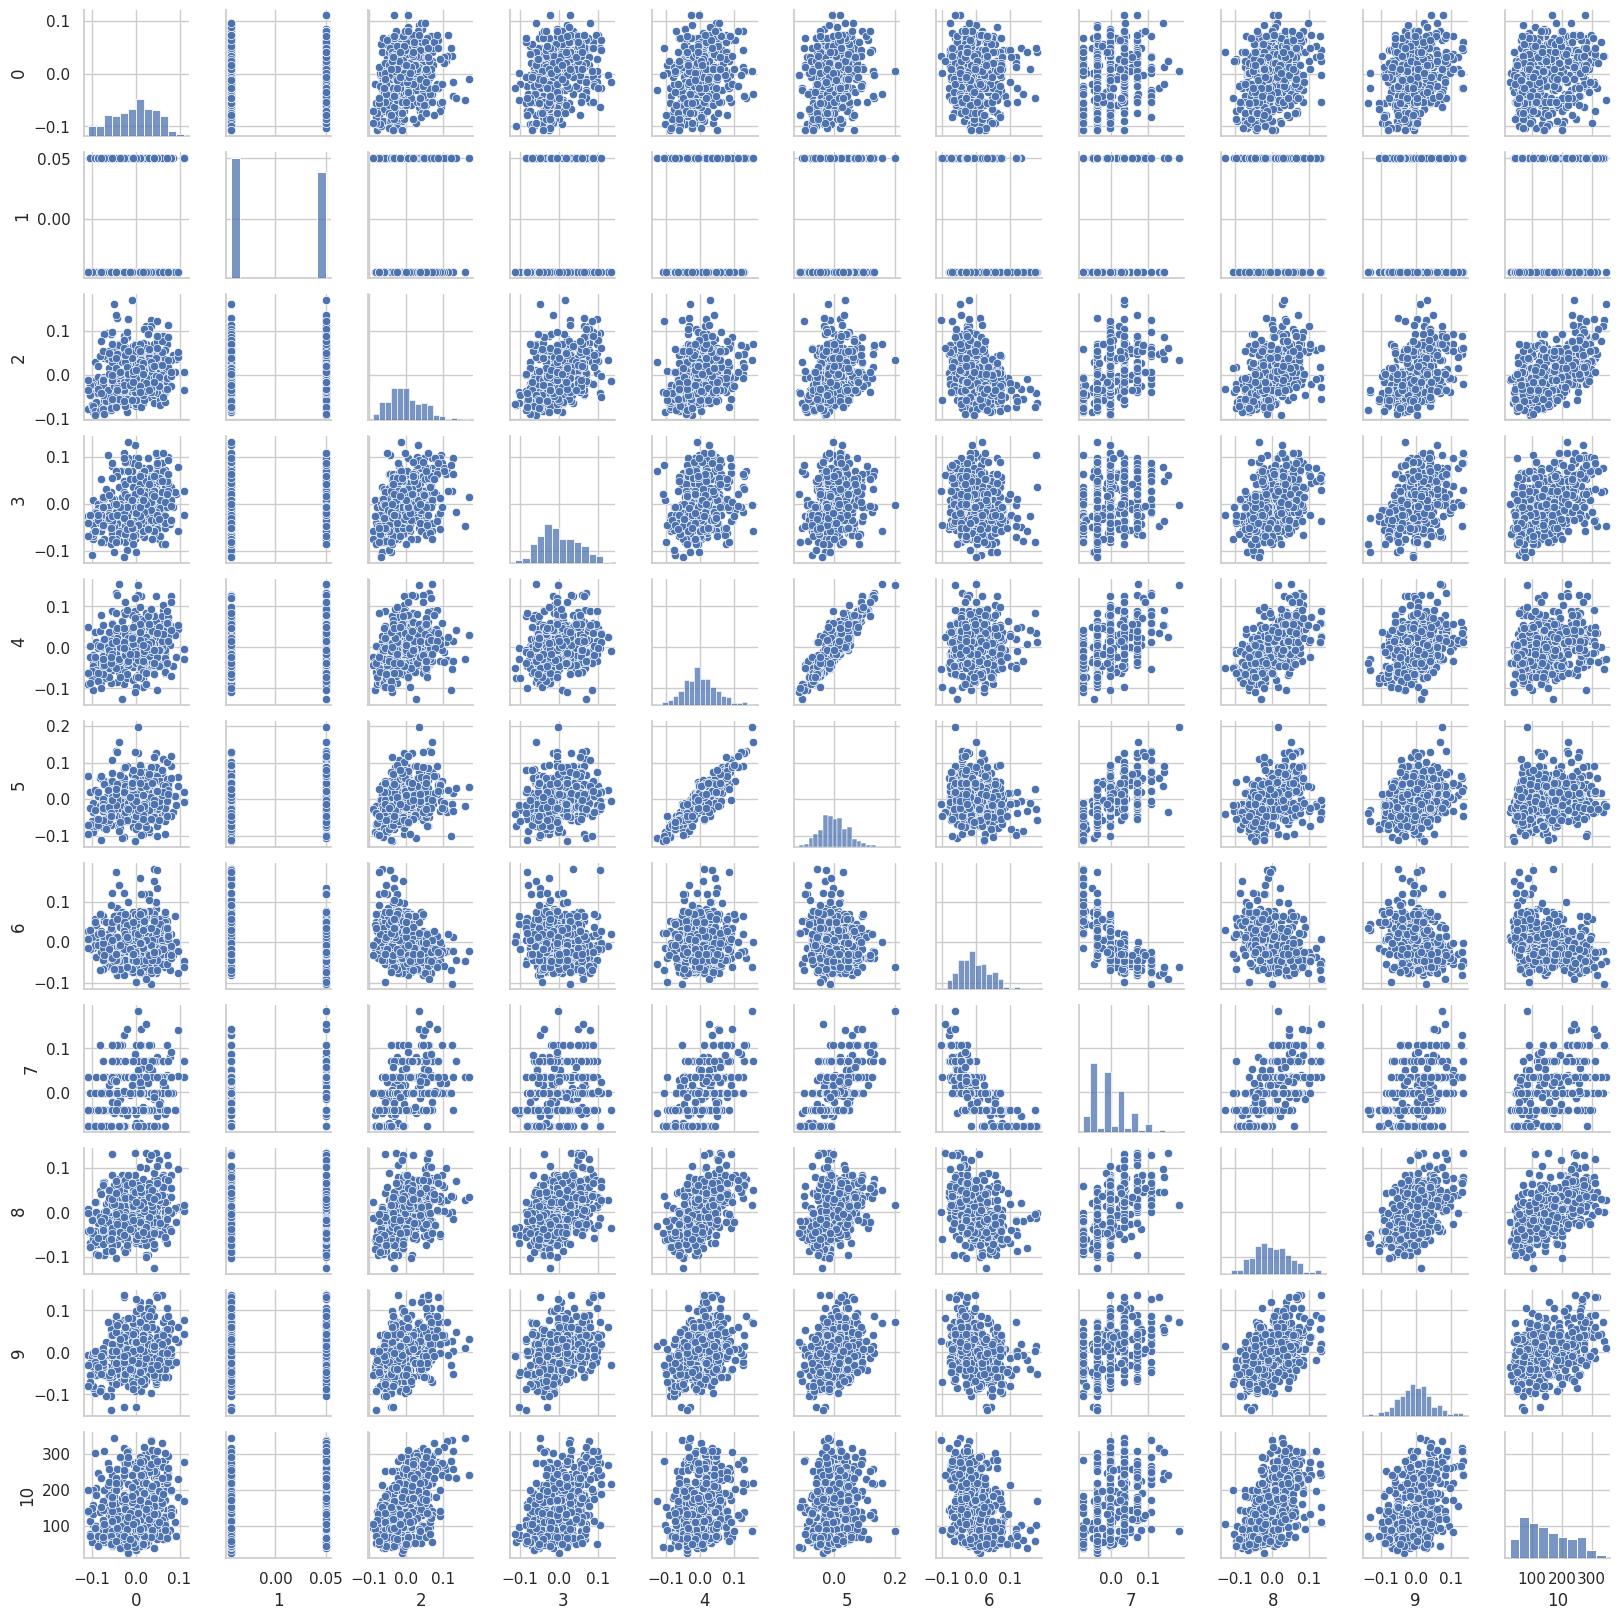

In [ ]:
# Grafiquemos los valores del vector de "etiquetas" y, es la variable que queremos predecir
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

D=np.append(X.T,[y],axis=0).T
D=pd.DataFrame(D)

sns.set(style='whitegrid', context='notebook')
sns.pairplot(pd.DataFrame(D),size=1.5)
plt.show()
#plt.plot(y,'.')


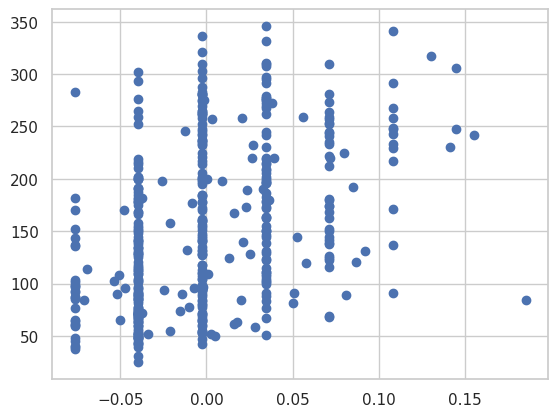

In [ ]:
# Grafiquemos ahora los atributos vs la variable a predecir
# Cambia el valor de idx para graficar otras variables
idx=7;
plt.scatter(X[:,idx], y);

(3) Responde lo siguiente:


*   ¿Qué tipo de atributos están presentes en este conjunto de datos?
*   ¿Cuál consideras que es la variable más informativa?



(4) Ahora aplicaremos regresión lineal, mediante el método de mínimos cuadrados.

(1000,)
(1000,)


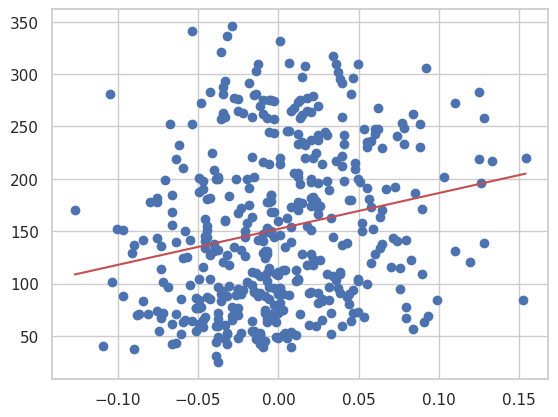

In [ ]:
# Regresión por mínimos cuadrados, modo fácil
from sklearn import linear_model
import numpy as np
regresor = linear_model.LinearRegression()

# Selecciona una sola dimensión para poder visualizar la línea aprendida
idx=4
D=X[:,idx]
#plt.plot(D,y,'.')
#np.transpose(D)
#print(D.shape)
D=D.reshape(-1,1)
#yh=[y.T]
#print(yh)
# Ajustemos un modelo lineal a los datos
regresor.fit(D,y)
plt.scatter(X[:,idx], y)
mirange=min(X[:,idx])
marange=max(X[:,idx])

xfit = np.linspace(mirange, marange, 1000)
print(xfit.shape)
ypred = regresor.predict(xfit.reshape(-1,1))
print(ypred.shape)
plt.plot(xfit, ypred,'r')

Estimemos el modelo usando todos los atributos, y realicemos una evaluación

Root mean squared error 1124.2712242307648


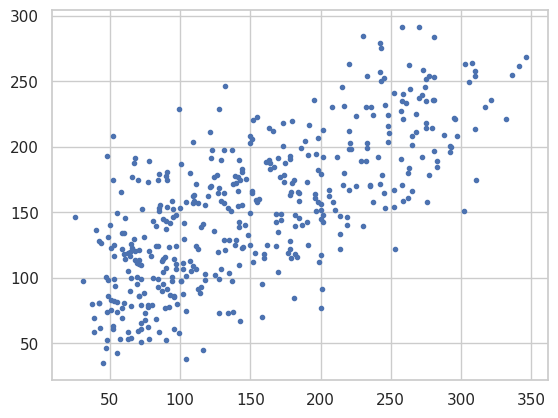

In [ ]:
import math
regresor = linear_model.LinearRegression()
regresor.fit(X,y)

# Obtengamos predicciones para los mismos datos en que fue entrenado el modelo

ypred=regresor.predict(X)

plt.plot(y,ypred,'.')

rmse= math.sqrt(sum((y-ypred)*(y-ypred)))
print('Root mean squared error',rmse)


Analicemos el modelo obtenido

In [ ]:

print("Coefficients: \n", regresor.coef_)
print("Coefficients: \n", regresor.intercept_)

Coefficients: 
 [ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]
Coefficients: 
 152.13348416289597


¿Cómo mejorar este modelo?

Root mean squared error 3.0203447487256215e-08


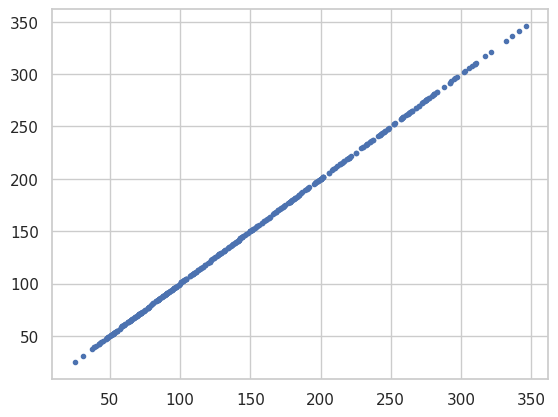

In [ ]:
## pedazo de código tomado de documentación de scikitlearn

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
model = Pipeline([('poly', PolynomialFeatures(degree=4)), ('linear', LinearRegression(fit_intercept=False))])
model = model.fit(X, y)

ypred=model.predict(X)

plt.plot(y,ypred,'.')

rmse= math.sqrt(sum((y-ypred)*(y-ypred)))
print('Root mean squared error',rmse)


¿Qué modelo es mejor?

**Ejercicio:** Explora otros métodos de regresión, usa otro conjunto de datos y realiza un análisis de los resultados. Compara el desempeño del modelo, con el modelo básico de regresión lineal.  Debes responder a las siguientes preguntas:

¿Cómo elegiste el método de regresión?

1.   ¿Qué modelo se desempeña mejor?
2.   ¿Crees que exista alguna correlación entre el modelo y el tipo de atributos?
3.   ¿Cuál es el atributo más importante para el modelo que construiste?
4. ¿Corresponde ese modelo con el anállisis de atributos que realizaste?
5.  ¿Cómo se compara el desempeño del modelo completo, con el modelo que solo usa la variable más importante?



Tip: https://scikit-learn.org/stable/modules/linear_model.html#




In [ ]:


#para usar cart
from sklearn import tree
m1 = tree.DecisionTreeRegressor()
m1 = m1.fit(X, y)
ypred = m1.predict(X)
rmse= math.sqrt(sum((y-ypred)*(y-ypred)))
print('rmse',rmse)


#para usar GP
from sklearn.gaussian_process import GaussianProcessRegressor
m2 = GaussianProcessRegressor ()
m2 = m2.fit(X, y)
ypred = m2.predict(X)
rmse= math.sqrt(sum((y-ypred)*(y-ypred)))
print('rmse',rmse)


#para usar SVM
from sklearn.gaussian_process import GaussianProcessRegressor
m2 = GaussianProcessRegressor ()
m2 = m2.fit(X, y)
ypred = m2.predict(X)
rmse= math.sqrt(sum((y-ypred)*(y-ypred)))
print('rmse',rmse)




rmse 0.0
rmse 327.20311812616353
rmse 327.20311812616353
